## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Reading File

In [2]:
df=pd.read_csv("bank-additional-full.csv",sep=';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(41188, 21)

In [5]:
df.marital.unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [6]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

### Understanding the Data

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int32
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int32(1), int64(4), object(11)


In [8]:
df["campaign"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 19, 18, 23, 14,
       22, 25, 16, 17, 15, 20, 56, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29,
       31, 30, 41, 37, 40, 33, 34, 43], dtype=int64)

In [9]:
df["default"].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [10]:
df["job"].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [11]:
df["marital"].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [12]:
df["education"].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [13]:
df["education"].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [14]:
df["housing"].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [15]:
df["loan"].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [16]:
df["contact"].unique()

array(['telephone', 'cellular'], dtype=object)

In [17]:
df["month"].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [18]:
df["day_of_week"].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [19]:
df["poutcome"].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [20]:
df["y"].unique()

array(['no', 'yes'], dtype=object)

In [21]:
df["default"].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [22]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [23]:
df['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [24]:
df["y"].value_counts(normalize=True).mul(100).round(1).astype(str) + "%"

no     88.7%
yes    11.3%
Name: y, dtype: object

In [25]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Data Visualization

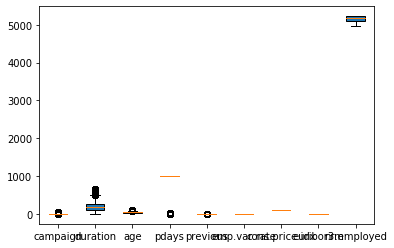

In [20]:
box_list=[df["campaign"],df["duration"],df["age"],df["pdays"],df["previous"],df["emp.var.rate"],df["cons.price.idx"],df["euribor3m"],df["nr.employed"]]
labels=["campaign", "duration", "age", "pdays", "previous", "emp.var.rate", "cons.price.idx", "euribor3m", "nr.employed"]
plt.boxplot(box_list, patch_artist=True, labels=labels, vert=1,)
plt.show()

### Data Manipulation

In [17]:
Q1=df["duration"].quantile(.25)
print(Q1)
Q3=df["duration"].quantile(.75)
print(Q3)
IQR=Q3-Q1
outliers=df["duration"][((df["duration"]<(Q1-1.5*IQR)) | (df["duration"]>(Q3+1.5*IQR)))]
print(outliers)

102.0
319.0
37       1666
57        787
61        812
75       1575
83       1042
         ... 
41147     712
41153     655
41160     843
41164    1868
41166     651
Name: duration, Length: 2963, dtype: int64


In [28]:
outliers.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            41178, 41179, 41180, 41181, 41182, 41183, 41184, 41185, 41186,
            41187],
           dtype='int64', length=38225)

In [18]:
median_duration=df["duration"].median()

In [30]:
median_duration

180.0

In [19]:
for i in outliers.index:
    df['duration'][i]=median_duration

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [4]:
df.replace(to_replace="unknown", value=np.NaN, inplace=True)

In [13]:
(df.isnull().sum()*100/len(df))

age                0.000000
job                0.000000
marital            0.194231
education          4.202680
default           20.872584
housing            2.403613
loan               2.403613
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
y                  0.000000
dtype: float64

In [11]:
df['job'].value_counts().index[0]

'admin.'

In [34]:
df.dropna(inplace=True)

In [35]:
df["education"].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'professional.course',
       'basic.9y', 'university.degree', 'illiterate'], dtype=object)

__Label Encoding__

In [36]:
df["education"]=df["education"].map({"illiterate":0, "basic.4y":1, "basic.6y":2, "basic.9y":3, "high.school":4, "university.degree":5, "professional.course":6})

In [37]:
df.education.unique()

array([1, 4, 2, 6, 3, 5, 0], dtype=int64)

In [42]:
df["education"].value_counts()

5    10412
4     7699
6     4321
3     4276
1     2380
2     1389
0       11
Name: education, dtype: int64

In [44]:
df["education"].value_counts().index[0]

5

In [12]:
df["job"].fillna(df["job"].value_counts().index[0], inplace=True)

In [143]:
df["job"].unique()

array(['housemaid', 'services', 'admin.', 'technician', 'blue-collar',
       'unemployed', 'retired', 'entrepreneur', 'management', 'student',
       'self-employed'], dtype=object)

In [14]:
na_list=["education", "marital", "default", "housing", "loan"]
for i in na_list:
    df[i]=df[i].fillna(df[i].value_counts().index[0])

In [15]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [146]:
df['age'].mean()

39.03001180792443

# Exploratory Data Analysis##

### Univariate Analysis

In [147]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


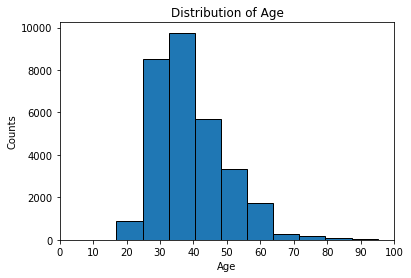

In [148]:
plt.hist(df["age"],10, histtype="bar", edgecolor="black")
ax=plt.axes()
ax.set_xticks([0,10,20,30,40,50,60,70,80,90,100])
plt.xlabel("Age")
plt.ylabel("Counts")
plt.title("Distribution of Age")
plt.show()

In [149]:
# This data describes the age of customers in a bank. Max no. of age customers around 25 to 55 age.

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


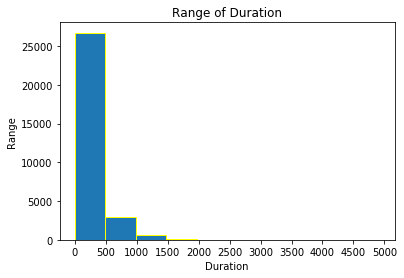

In [150]:
plt.hist(df["duration"], 10, histtype="bar", edgecolor="yellow")
ax=plt.axes()
ax.set_xticks([0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000])
plt.xlabel("Duration")
plt.ylabel("Range")
plt.title("Range of Duration")
plt.show()


In [151]:
# Max no. of customers are staying with this bank of an average of 500 days

In [152]:
# df["campaign"]=df["campaign"].apply(str)

In [23]:
df["campaign"]=df["campaign"].astype("int")

In [24]:
df["campaign"].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64

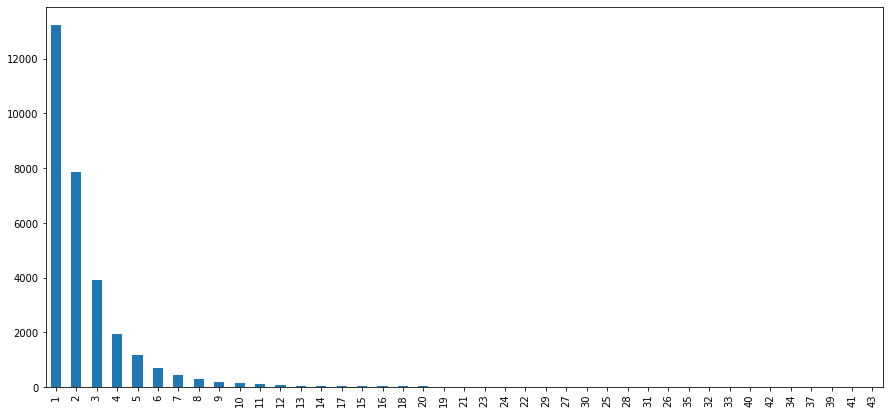

In [155]:
df["campaign"].value_counts().plot(kind="bar", figsize=(15,7))


In [156]:
list_campaign=df["campaign"].unique()
list_campaign

[1, 2, 3, 4, 5, ..., 27, 40, 43, 34, 33]
Length: 41
Categories (41, int64): [1, 2, 3, 4, ..., 40, 43, 34, 33]

In [157]:
# df["campaign"]="Category" + df["campaign"].astype(str)
# df["campaign"].unique()

In [158]:
df['job'].value_counts()

admin.           8737
blue-collar      5675
technician       5473
services         2857
management       2311
retired          1216
self-employed    1092
entrepreneur     1089
unemployed        738
housemaid         690
student           610
Name: job, dtype: int64

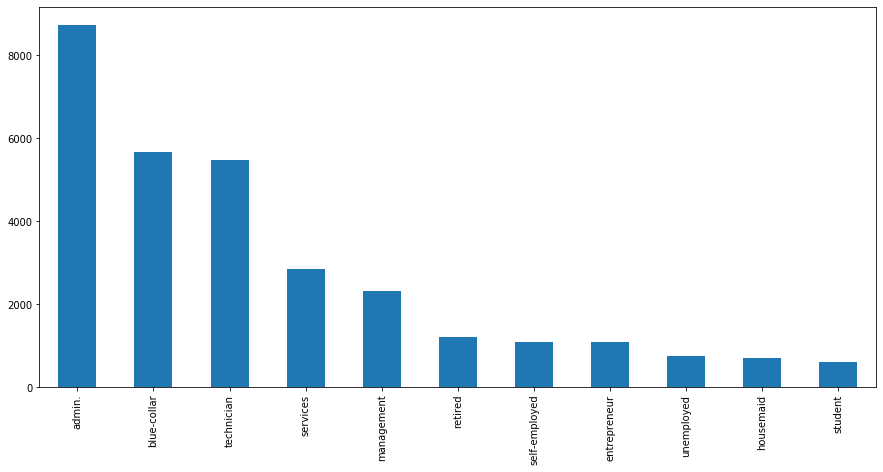

In [159]:
df["job"].value_counts().plot(kind="bar", figsize=(15,7))

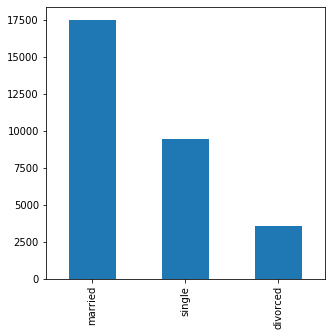

In [160]:
df["marital"].value_counts().plot(kind="bar", figsize=(5,5))

In [161]:
df["education"].value_counts()

5    10412
4     7699
6     4321
3     4276
1     2380
2     1389
0       11
Name: education, dtype: int64

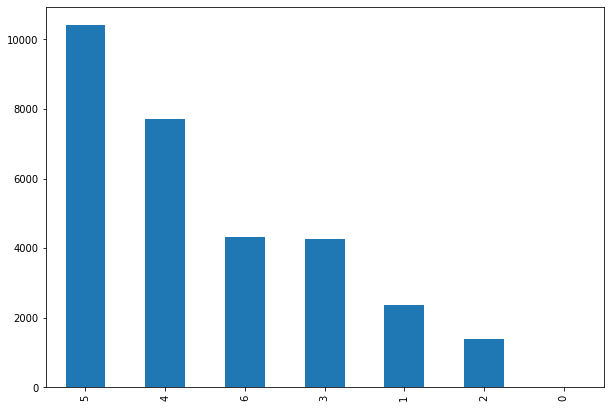

In [162]:
df["education"].value_counts().plot(kind="bar", figsize=(10,7))

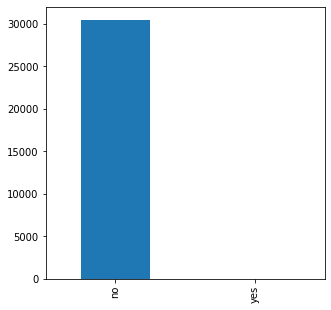

In [163]:
df["default"].value_counts().plot(kind="bar", figsize=(5,5))

In [164]:
df["default"].value_counts()

no     30485
yes        3
Name: default, dtype: int64

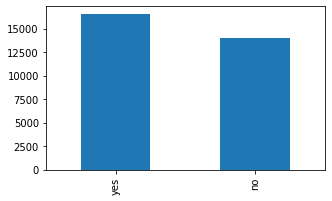

In [165]:
df["housing"].value_counts().plot(kind="bar", figsize=(5,3))

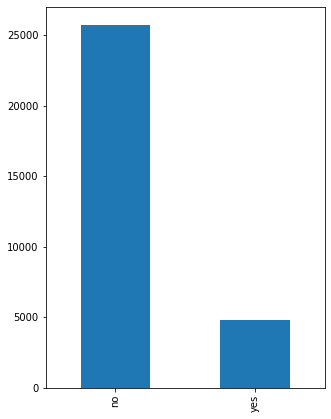

In [166]:
df["loan"].value_counts().plot(kind="bar", figsize=(5,7))

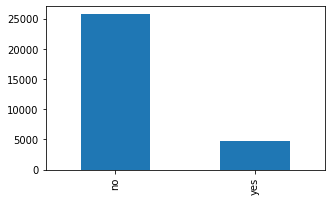

In [167]:
df["loan"].value_counts().plot(kind="bar", figsize=(5,3))

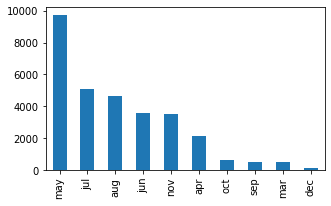

In [168]:
df["month"].value_counts().plot(kind="bar", figsize=(5,3))

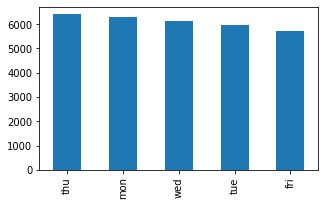

In [169]:
df["day_of_week"].value_counts().plot(kind="bar", figsize=(5,3))

In [170]:
! pip install seaborn

## Bivariate Analysis##

In [171]:
import scipy as sp

In [172]:
import seaborn as sns

In [173]:
df.corr()

,age,education,duration,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.153304,0.007910,-0.050891,0.049231,-0.050409,-0.035762,0.125017,-0.036481,-0.064586
education,-0.153304,1.000000,-0.017383,-0.017895,0.009359,0.008747,-0.041988,0.063928,0.012061,0.009639
duration,0.007910,-0.017383,1.000000,-0.046239,0.018772,-0.023374,0.012768,-0.009525,-0.028922,-0.040367
pdays,-0.050891,-0.017895,-0.046239,1.000000,-0.590248,0.268763,0.068010,-0.102368,0.295188,0.370845
previous,0.049231,0.009359,0.018772,-0.590248,1.000000,-0.403502,-0.176775,-0.027930,-0.438863,-0.488365
emp.var.rate,-0.050409,0.008747,-0.023374,0.268763,-0.403502,1.000000,0.766055,0.157593,0.969412,0.900390
cons.price.idx,-0.035762,-0.041988,0.012768,0.068010,-0.176775,0.766055,1.000000,0.027217,0.667292,0.488871
cons.conf.idx,0.125017,0.063928,-0.009525,-0.102368,-0.027930,0.157593,0.027217,1.000000,0.243637,0.075283
euribor3m,-0.036481,0.012061,-0.028922,0.295188,-0.438863,0.969412,0.667292,0.243637,1.000000,0.944871
nr.employed,-0.064586,0.009639,-0.040367,0.370845,-0.488365,0.900390,0.488871,0.075283,0.944871,1.000000


In [174]:
def heatMap(df):
    corr=df.corr()
    print(corr.columns)
#     fig, ax=plt.subplots(figsize=(10,7))
    sns.heatmap(corr, annot=True, fmt=".2f")
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.show()

Index(['age', 'education', 'duration', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


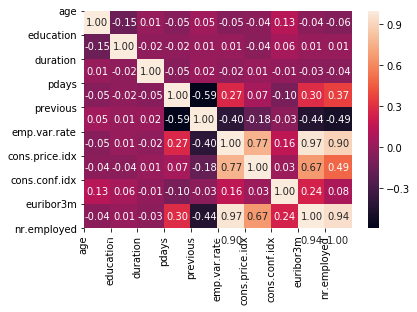

In [175]:
heatMap(df)

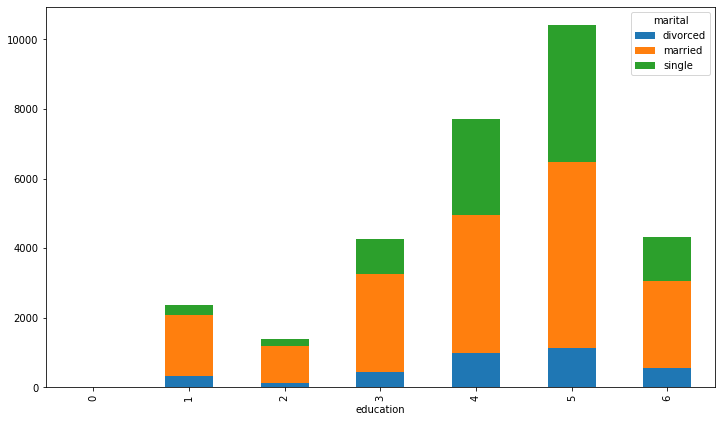

In [176]:
df.groupby(["education",'marital']).size().unstack(fill_value=0).plot(kind='bar',stacked=True,figsize=(12,7))

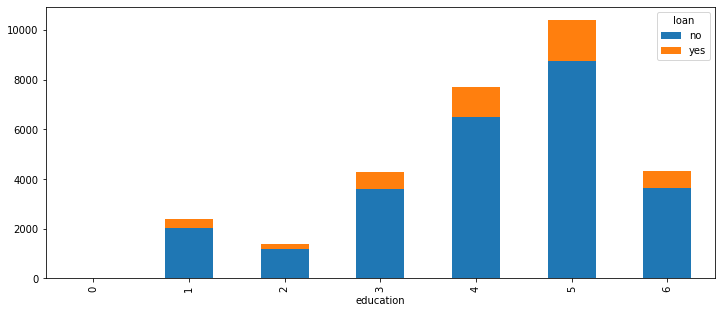

In [177]:
df.groupby(["education",'loan']).size().unstack(fill_value=0).plot(kind='bar',stacked=True,figsize=(12,5))

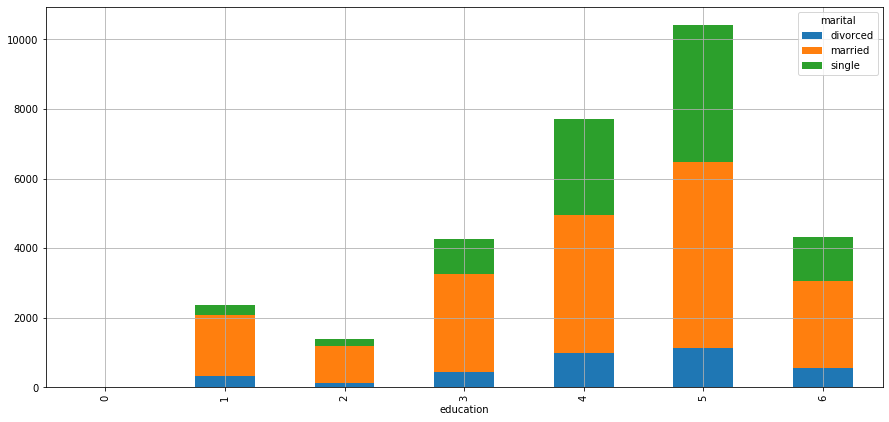

In [178]:
df.groupby(["education",'marital']).size().unstack().plot(kind="bar", stacked=True, grid=True, figsize=(15,7))

default          no  yes
job                     
admin.         8737    0
blue-collar    5675    0
entrepreneur   1089    0
housemaid       690    0
management     2311    0
retired        1216    0
self-employed  1092    0
services       2857    0
student         610    0
technician     5471    2
unemployed      737    1


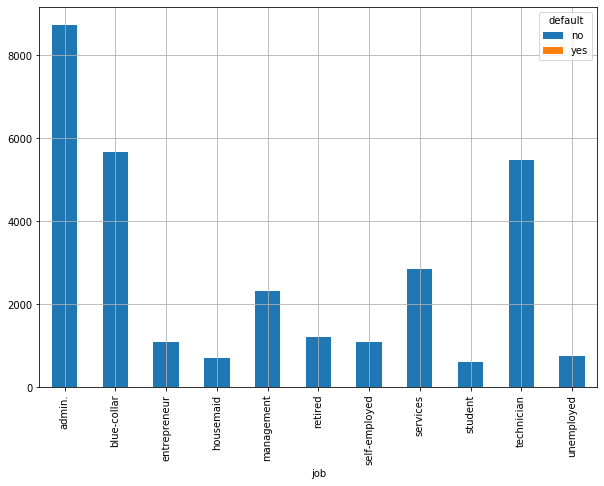

In [179]:
print(df.groupby(["job", "default"]).size().unstack(fill_value=0))
df.groupby(["job", "default"]).size().unstack().plot(kind="bar", stacked=True, grid=True, figsize=(10,7))

In [180]:
df.groupby(["housing", "default"]).size().unstack()

default,no,yes
housing,,
no,13965,2
yes,16520,1


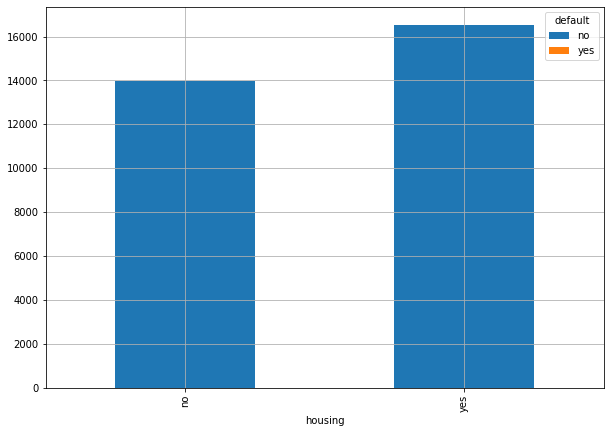

In [181]:
df.groupby(["housing", "default"]).size().unstack().plot(kind="bar", stacked=True, grid=True, figsize=(10,7))

day_of_week   fri   mon   thu   tue   wed
month                                    
apr           455   550   637   213   260
aug           804   922  1014   994   939
dec            23    46    40    23    25
jul           718  1036  1197  1034  1096
jun           757   874   620   673   690
mar            86   118    87   121    70
may          2046  1893  1780  1963  2051
nov           622   635   773   702   764
oct           122   122   142   133   123
sep           101    83   105    99   107


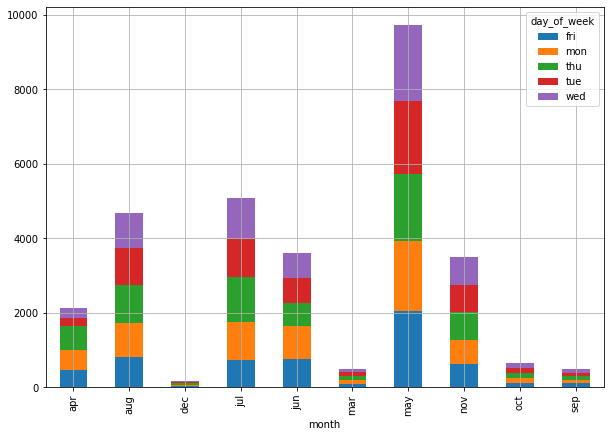

In [182]:
print(df.groupby(["month", "day_of_week"]).size().unstack())
df.groupby(["month", "day_of_week"]).size().unstack().plot(kind="bar", stacked=True, grid=True, figsize=(10,7))

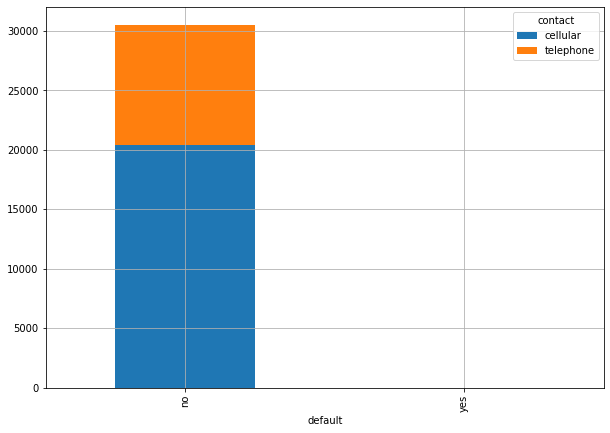

In [183]:
df.groupby(["default","contact"]).size().unstack().plot(kind="bar", stacked=True, grid=True, figsize=(10,7))

In [184]:
df.groupby(["job",'loan']).size().unstack()

loan,no,yes
job,,
admin.,7253,1484
blue-collar,4782,893
entrepreneur,930,159
housemaid,593,97
management,1956,355
retired,1050,166
self-employed,938,154
services,2424,433
student,508,102


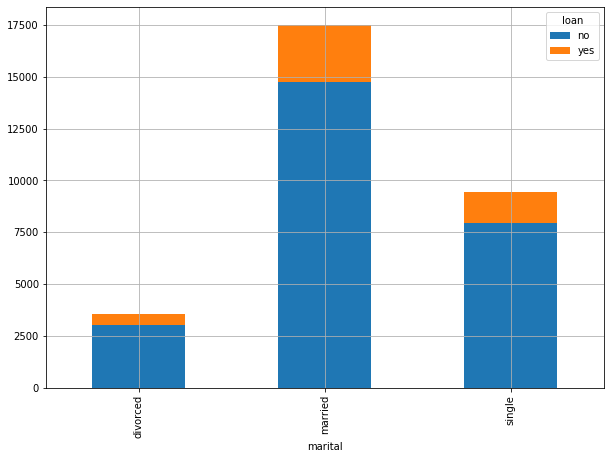

In [185]:
df.groupby(["marital",'loan']).size().unstack().plot(kind="bar", stacked=True, grid=True, figsize=(10,7))

In [196]:
pd.pivot_table(df, index=["default"],values=['duration'],aggfunc=np.sum)

,duration
default,
no,7910841
yes,310


In [83]:
# df.pairplot(df, hue="loan", size=3)
# plt.show()

In [84]:
df.pivot_table(df, columns=["loan"], index=["housing", "default"])

age            cons.conf.idx            cons.price.idx  \
loan                    no        yes            no        yes             no   
housing default                                                                 
no      no       40.082861  39.801721    -40.302857 -40.556785      93.624157   
        yes      39.500000        NaN    -39.050000        NaN      93.322000   
yes     no       40.032373  39.877811    -40.623445 -40.718369      93.537121   
        yes      48.000000        NaN    -36.100000        NaN      93.444000   

                              duration             emp.var.rate            \
loan                   yes          no         yes           no       yes   
housing default                                                             
no      no       93.629338  260.847974  259.640594     0.180863  0.203989   
        yes            NaN   88.500000         NaN     0.650000       NaN   
yes     no       93.524709  256.103794  257.471688    -0.003947  0.004795   
        yes            NaN  133.000000         NaN     1.400000       NaN   

                euribor3m            nr.employed                    pdays  \
loan                   no       yes           no          yes          no   
housing default                                                             
no      no       3.731637  3.737090  5170.487487  5171.724951  964.884766   
        yes      4.558000       NaN  5211.950000          NaN  999.000000   
yes     no       3.527870  3.537689  5163.852564  5165.003685  960.431758   
        yes      4.963000       NaN  5228.100000          NaN  999.000000   

                             previous            
loan                    yes        no       yes  
housing default                                  
no      no       962.491983  0.160182  0.166993  
        yes             NaN  0.500000       NaN  
yes     no       962.399621  0.184646  0.172853  
        yes             NaN  0.000000       NaN

In [85]:
df.pivot_table(df,columns=["loan"], index=["month", "day_of_week"])

age            cons.conf.idx             \
loan                      no        yes            no        yes   
month day_of_week                                                  
apr   fri          40.060665  37.919192    -46.659687 -46.216162   
      mon          40.205042  41.822430    -46.238655 -46.632710   
      thu          40.100763  41.247788    -46.241221 -45.993805   
      tue          43.370892  40.769231    -45.574178 -44.535897   
      wed          42.224409  37.847826    -46.460236 -46.556522   
aug   fri          41.117325  41.246835    -35.408991 -35.412025   
      mon          41.548325  40.966102    -35.669761 -35.832768   
      thu          41.218667  40.864865    -35.593067 -35.642793   
      tue          42.484821  40.732955    -35.630268 -35.600000   
      wed          42.333969  41.189744    -35.603340 -35.770769   
dec   fri          44.700000  46.500000    -34.290000 -36.225000   
      mon          43.200000  47.769231    -33.322500 -34.984615   
      thu          52.424242  56.583333    -33.390909 -34.075000   
      tue          40.772727  51.000000    -33.586364 -33.000000   
      wed          50.060606  35.000000    -33.390909 -33.000000   
jul   fri          39.396450  41.053892    -42.272308 -42.375449   
      mon          40.062954  40.061372    -42.517353 -42.504332   
      thu          38.533808  40.595506    -42.363274 -42.319476   
      tue          39.134540  39.768293    -42.328639 -42.240244   
      wed          37.553398  37.294118    -42.354207 -42.324887   
jun   fri          40.550620  40.022346    -41.668802 -41.649162   
      mon          39.667286  38.645714    -41.557435 -41.600000   
      thu          40.900718  39.450382    -41.670813 -41.540458   
      tue          39.471883  39.776316    -41.439364 -41.457895   
      wed          38.648084  38.057377    -41.564228 -41.545902   
mar   fri          37.447059  39.777778    -42.847059 -44.933333   
      mon          42.488189  38.937500    -42.220472 -46.200000   
      thu          38.964286  39.400000    -41.676190 -44.933333   
      tue          39.860870  35.600000    -42.730435 -42.096000   
      wed          47.966102  48.818182    -42.271186 -45.854545   
may   fri          38.838028  38.504505    -40.376802 -40.528378   
      mon          39.648282  39.690698    -41.038246 -40.979535   
      thu          38.189744  37.905612    -40.852401 -41.689286   
      tue          39.620732  39.410053    -40.175895 -40.074603   
      wed          38.967690  38.756152    -40.295315 -40.976286   
nov   fri          43.699357  43.187970    -41.474437 -41.529323   
      mon          42.654079  41.250000    -40.668429 -40.423077   
      thu          38.853129  38.833333    -41.537548 -41.750000   
      tue          41.166189  42.974138    -41.240401 -41.072414   
      wed          39.347945  37.766917    -41.320411 -40.790226   
oct   fri          41.984252  39.533333    -34.722835 -35.333333   
      mon          41.875000  43.120000    -38.064423 -39.544000   
      thu          46.682432  43.800000    -33.127027 -31.420000   
      tue          44.907692  46.526316    -32.593846 -32.847368   
      wed          45.218487  43.000000    -34.794958 -35.375000   
sep   fri          46.560000  46.000000    -32.572000 -32.880000   
      mon          41.679012  39.222222    -34.648148 -33.222222   
      thu          40.972222  40.428571    -35.503704 -34.200000   
      tue          46.607843  42.937500    -32.593137 -32.206250   
      wed          42.340206  44.642857    -34.562887 -34.200000   

                  cons.price.idx               duration              \
loan                          no        yes          no         yes   
month day_of_week                                                     
apr   fri              93.098742  93.122657  312.019569  283.626263   
      mon              93.121444  93.100196  245.028571  242.943925   
      thu              93.121305  93.134646  324.404580  331.1061

In [86]:
df.pivot_table(df, columns=["loan"], index=["job", "default"])

age            cons.conf.idx             \
loan                          no        yes            no        yes   
job           default                                                  
admin.        no       38.396772  38.499717    -40.188203 -40.266101   
blue-collar   no       39.599391  39.303807    -41.340581 -41.579283   
entrepreneur  no       41.674400  42.019417    -41.177520 -41.927670   
housemaid     no       45.639073  44.681818    -39.498675 -39.475325   
management    no       42.484909  41.671982    -40.407807 -40.951708   
retired       no       61.886486  62.895833    -38.549189 -38.720417   
self-employed no       39.962480  39.866667    -40.503426 -40.391795   
services      no       37.913599  37.998336    -41.286045 -41.312479   
student       no       25.863574  26.056338    -40.013506 -41.085915   
technician    no       38.505389  38.501517    -39.900608 -40.092113   
              yes      48.000000        NaN    -36.100000        NaN   
unemployed    no       39.733796  39.791946    -40.110532 -39.397315   
              yes      31.000000        NaN    -42.000000        NaN   

                      cons.price.idx               duration              \
loan                              no        yes          no         yes   
job           default                                                     
admin.        no           93.540593  93.535331  254.930106  248.436333   
blue-collar   no           93.660500  93.634460  265.344574  259.909956   
entrepreneur  no           93.609346  93.581257  266.552000  243.339806   
housemaid     no           93.676225  93.678643  250.748344  248.727273   
management    no           93.525144  93.509232  256.874447  258.097950   
retired       no           93.434916  93.405321  270.761486  291.908333   
self-employed no           93.551629  93.612497  259.930669  290.620513   
services      no           93.633582  93.640694  257.706651  262.272879   
student       no           93.311368  93.436113  281.361528  295.669014   
technician    no           93.564843  93.542100  248.441412  260.952477   
              yes          93.444000        NaN   99.500000         NaN   
unemployed    no           93.562263  93.575027  253.225694  228.496644   
              yes          93.200000        NaN  111.000000         NaN   

                      emp.var.rate           euribor3m            nr.employed  \
loan                            no       yes        no       yes           no   
job           default                                                           
admin.        no          0.024797  0.032541  3.564063  3.554628  5164.333478   
blue-collar   no          0.255756  0.209956  3.779910  3.726293  5175.818763   
entrepreneur  no          0.162960  0.133010  3.800028  3.737063  5176.154800   
housemaid     no          0.430574  0.450000  4.005522  4.033903  5179.197020   
management    no         -0.023260  0.047153  3.598505  3.683838  5165.610342   
retired       no         -0.686486 -0.771250  2.780694  2.704529  5122.398108   
self-employed no          0.083116  0.163590  3.679094  3.754026  5170.409217   
services      no          0.169329  0.209151  3.693218  3.732636  5171.358640   
student       no         -1.434379 -1.271831  1.875368  1.929937  5085.765757   
technician    no          0.271193  0.291911  3.816409  3.841304  5175.287291   
              yes         1.400000       NaN  4.963000       NaN  5228.100000   
unemployed    no         -0.127546 -0.020134  3.442772  3.600047  5156.580787   
              yes        -0.100000       NaN  4.153000       NaN  5195.800000   

                                         pdays              previous            
loan                           yes          no         yes        no       yes  
job           default                                                           
admin.        no       5164.711715  953.250751  956.840407  0.191430  0.170345  
blue-collar   no       5174.439385  984.529158  988.80

In [87]:
df.pivot_table(df, columns=["loan"], index=["housing", "contact"])

age            cons.conf.idx             \
loan                      no        yes            no        yes   
housing contact                                                    
no      cellular   40.113801  39.897552    -41.275282 -41.481894   
        telephone  40.037923  39.653731    -38.895675 -39.128159   
yes     cellular   39.888907  39.862096    -41.431294 -41.518254   
        telephone  40.320617  39.911168    -39.006772 -39.020474   

                  cons.price.idx               duration              \
loan                          no        yes          no         yes   
housing contact                                                       
no      cellular       93.321797  93.352820  266.349721  265.806701   
        telephone      94.061487  94.056360  252.836125  250.118408   
yes     cellular       93.309516  93.303349  261.217339  263.023117   
        telephone      93.992390  93.994585  245.855508  245.687817   

                  emp.var.rate           euribor3m            nr.employed  \
loan                        no       yes        no       yes           no   
housing contact                                                             
no      cellular     -0.361333 -0.281057  3.126006  3.191665  5153.270218   
        telephone     0.965398  0.953035  4.608052  4.579378  5195.408255   
yes     cellular     -0.418325 -0.394022  3.061388  3.089694  5150.907359   
        telephone     0.825163  0.851354  4.461211  4.488635  5189.757304   

                                     pdays              previous            
loan                       yes          no         yes        no       yes  
housing contact                                                             
no      cellular   5156.707603  946.431519  943.969716  0.251921  0.257732  
        telephone  5194.915920  991.591380  991.095522  0.027566  0.026866  
yes     cellular   5152.721204  944.781786  949.119171  0.256675  0.234356  
        telephone  5191.075381  991.742807  990.589679  0.040534  0.042301

In [88]:
df.pivot_table(df, columns=["loan"], index=["marital", "month"])

age            cons.conf.idx            cons.price.idx  \
loan                   no        yes            no        yes             no   
marital  month                                                                 
divorced apr    45.202335  45.888889    -46.175875 -45.711111      93.124829   
         aug    43.873706  42.522727    -35.643685 -35.747727      93.323387   
         dec    63.142857  66.400000    -33.921429 -35.580000      92.716071   
         jul    44.560000  45.369318    -42.466133 -42.370455      93.898872   
         jun    44.978000  43.557143    -41.646000 -41.557143      94.327076   
         mar    58.320755  60.142857    -41.683019 -45.657143      93.130811   
         may    43.533487  43.005291    -40.328868 -40.242328      93.555470   
         nov    45.220833  45.342857    -41.289792 -41.401429      93.200935   
         oct    60.224138  55.333333    -35.153448 -40.955556      93.232017   
         sep    57.488372  50.857143    -34.097674 -34.200000      93.394814   
married  apr    44.029664  42.675214    -46.368150 -46.565812      93.114461   
         aug    44.832606  44.093697    -35.635429 -35.673595      93.321168   
         dec    52.233333  49.291667    -33.573333 -34.612500      92.714911   
         jul    41.540647  42.168210    -42.429163 -42.367130      93.897041   
         jun    41.545045  41.586134    -41.636105 -41.638235      94.299724   
         mar    46.514563  42.612903    -42.400000 -44.116129      93.106000   
         may    40.613398  40.577659    -40.080829 -40.443305      93.584704   
         nov    42.446561  42.585366    -41.357481 -41.104065      93.205812   
         oct    49.340058  49.054545    -33.315562 -34.867273      93.054349   
         sep    49.732852  47.962963    -33.358123 -32.794444      93.220011   
single   apr    32.757971  32.387931    -46.212319 -45.483621      93.122864   
         aug    33.067568  33.264822    -35.438964 -35.592490      93.269255   
         dec    29.909091  38.800000    -33.293182 -33.000000      92.713977   
         jul    32.186887  32.505650    -42.241249 -42.326271      93.887027   
         jun    33.507246  32.582160    -41.421483 -41.400939      94.077805   
         mar    31.246445  33.078947    -42.508057 -44.400000      93.102261   
         may    33.636508  33.747899    -41.650526 -41.945210      93.409777   
         nov    35.048667  34.814371    -40.988181 -41.086228      93.201520   
         oct    32.291480  27.076923    -36.097309 -34.373077      93.319816   
         sep    30.178571  28.571429    -34.933333 -34.933333      93.592333   

                             duration             emp.var.rate            \
loan                  yes          no         yes           no       yes   
marital  month                                                             
divorced apr    93.149889  286.968872  333.074074    -1.800000 -1.800000   
         aug    93.350875  213.706004  217.386364     0.686128  0.903409   
         dec    92.721600  303.000000  262.000000    -2.800000 -2.440000   
         jul    93.900256  275.906667  270.073864     1.237067  1.143750   
         jun    94.322571  225.480000  232.042857     0.935800  0.827143   
         mar    92.993286  252.490566  352.000000    -1.800000 -1.800000   
         may    93.566873  256.662048  240.507937    -0.080985 -0.066138   
         nov    93.205414  246.408333  276.285714    -0.397292 -0.364286   
         oct    93.788444  294.758621  411.333333    -2.327586 -1.755556   
         sep    93.419000  284.674419  290.714286    -2.116279 -2.085714   
married  apr    93.103803  296.211553  276.141026    -1.800000 -1.800000   
         aug    93.331245  231.776128  246.524702     0.833566  0.940204   
         dec    92.718375  303.844444  395.500000    -2.875556 -2.650000   
         jul    93.899583  274.524025  273.983025     1.207857  1.142593   
         jun    94.309223  240.357242  244.142857     0.866771  0.889286   
         mar 

In [85]:
cat_columns=["job","marital","education","default","housing","loan","contact","month","day_of_week","poutcome"]
for i, j in enumerate(cat_columns):
    print("for value ",j, "index is ",i)

for value  job index is  0
for value  marital index is  1
for value  education index is  2
for value  default index is  3
for value  housing index is  4
for value  loan index is  5
for value  contact index is  6
for value  month index is  7
for value  day_of_week index is  8
for value  poutcome index is  9


In [89]:
import matplotlib.ticker as mtick

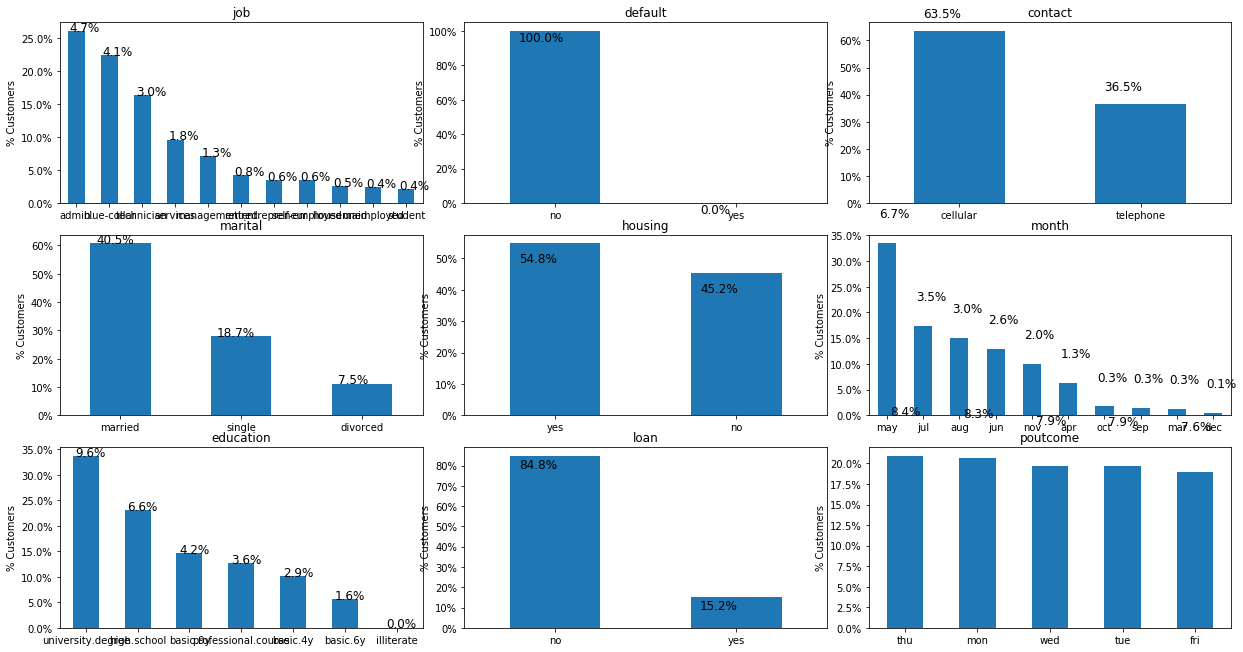

In [90]:
cat_columns=["job","marital","education","default","housing","loan","contact","month","day_of_week","poutcome"]
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(17,9))
fig.tight_layout()
for i, item in enumerate(cat_columns):
    if i < 3:
        ax =(df[item].value_counts()*100/len(df)).plot(kind = 'bar',ax=axes[i,0],rot = 0)
        ax.set_ylabel('% Customers')
        ax.yaxis.set_major_formatter(mtick.PercentFormatter())
        
        totals = []
        for i in ax.patches:
            totals.append(i.get_width())
        total = sum(totals)
        
        for i in ax.patches:
            ax.text(i.get_x()+.05, i.get_height(), \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='black')
        
    elif i >=3 and i < 6:
        ax =(df[item].value_counts()*100/len(df)).plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        ax.set_ylabel('% Customers')
        ax.yaxis.set_major_formatter(mtick.PercentFormatter())
        
        totals = []
        for i in ax.patches:
            totals.append(i.get_width())
        total = sum(totals)
        
        for i in ax.patches:
            ax.text(i.get_x()+.05, i.get_height()-6, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='black')
        
    elif i < 9:
        ax =(df[item].value_counts()*100/len(df)).plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
        ax.set_ylabel('% Customers')
        ax.yaxis.set_major_formatter(mtick.PercentFormatter())
        
        totals = []
        for i in ax.patches:
            totals.append(i.get_width())
        total = sum(totals)
        
        for i in ax.patches:
            ax.text(i.get_x()+.05, i.get_height()+5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='black')
        
    ax.set_title(item)

In [91]:
# df["Loan"]=df["loan"].map({"yes":1, "no":2})

In [92]:
# df.drop("loan", axis=1, inplace=True)

In [93]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [94]:
df.drop(["emp.var.rate", "pdays", "euribor3m", "nr.employed"], axis=1, inplace=True)

In [95]:
df.drop("cons.conf.idx", axis=1, inplace=True)

In [96]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,cons.price.idx,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,nonexistent,93.994,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,149,1,0,nonexistent,93.994,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,nonexistent,93.994,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,nonexistent,93.994,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,nonexistent,93.994,no


In [97]:
df["job"].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed',
       'entrepreneur', 'student'], dtype=object)

In [98]:
df["job"]=df["job"].map({"housemaid":1, "services":2, "admin.":3, "blue-collar":4, "technician":5, "retired":6, "management":7, "unemployed":8, "self-employed":9, "entrepreneur":10, "student":11})

In [99]:
df["marital"].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [100]:
df["marital"]=df["marital"].map({"married":1, "single":2, "divorced":3})

In [101]:
df["education"].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'university.degree', 'illiterate'],
      dtype=object)

In [102]:
df["education"]=df["education"].map({"basic.4y":1, "high.school":2, "basic.6y":3, "basic.9y":4, "professional.course":5, "university.degree":6, "illiterate":7})

In [103]:
df["default"].unique()

array(['no', 'yes'], dtype=object)

In [104]:
df["default"]=df["default"].map({"no":0, "yes":1})

In [105]:
df["housing"].unique()

array(['no', 'yes'], dtype=object)

In [106]:
df["housing"]=df["housing"].map({"no":0, "yes":1})

In [107]:
df["loan"]=df["loan"].map({"no":0, "yes":1})

In [108]:
df["contact"].unique()

array(['telephone', 'cellular'], dtype=object)

In [109]:
df["contact"]=df["contact"].map({"telephone":1, "cellular":2})

In [110]:
df["month"].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [111]:
df["month"]=df["month"].map({"mar":3, "apr":4, "may":5, "jun":6, "jul":7, "aug":8, "sep":9, "oct":10, "nov":11, "dec":12})

In [112]:
df["day_of_week"].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [113]:
df["day_of_week"]=df["day_of_week"].map({"mon":1, "tue":2, "wed":3, "thu":4, "fri":5})

In [114]:
df["poutcome"].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [115]:
df["poutcome"]=df["poutcome"].map({"nonexistent":1, "failure":2, "success":3})

In [116]:
df["y"].unique()

array(['no', 'yes'], dtype=object)

In [117]:
df["y"]=df["y"].map({"no":0, "yes":1})

In [118]:
# df.drop("campaign", axis=1, inplace=True)

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import metrics as sm

In [120]:
X_train, X_test, y_train, y_test=train_test_split(df.drop("loan", axis=1), df["loan"], test_size=0.25, random_state=42)

In [121]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(30891, 15) (10297, 15) (30891,) (10297,)


### LOGISTIC Regression

In [122]:
logreg_model=LogisticRegression(class_weight='balanced')
logreg_model.fit(X_train, y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [123]:
train_result=logreg_model.predict(X_train)
print(train_result[:10])

[0 0 1 1 1 0 0 1 1 1]


In [124]:
final_result=logreg_model.predict(X_test)
print(final_result[:10])

[0 1 0 0 1 1 1 1 1 1]


In [125]:
print(confusion_matrix(y_train, train_result))

[[13227 12978]
 [ 2108  2578]]


In [126]:
print(confusion_matrix(y_test, final_result))

[[4444 4291]
 [ 716  846]]


In [127]:
print(classification_report(y_test, final_result))

              precision    recall  f1-score   support

           0       0.86      0.51      0.64      8735
           1       0.16      0.54      0.25      1562

    accuracy                           0.51     10297
   macro avg       0.51      0.53      0.45     10297
weighted avg       0.76      0.51      0.58     10297



In [128]:
print("Logistic Regression test accuracy:",accuracy_score(y_test,final_result))

Logistic Regression test accuracy: 0.5137418665630766


In [129]:
print("Logistic Regression train accuracy:",accuracy_score(y_train, train_result))

Logistic Regression train accuracy: 0.5116376938266809


### Decision Tree

In [130]:
from sklearn.tree import DecisionTreeClassifier

In [131]:
dt_model=DecisionTreeClassifier(class_weight='balanced')

In [132]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [138]:
train_result1=dt_model.predict(X_train)
train_result1[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [133]:
final_result1=dt_model.predict(X_test)
final_result1[:10]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [134]:
print(confusion_matrix(y_test, final_result1))

[[7415 1320]
 [1326  236]]


In [135]:
print(classification_report(y_test, final_result1))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      8735
           1       0.15      0.15      0.15      1562

    accuracy                           0.74     10297
   macro avg       0.50      0.50      0.50     10297
weighted avg       0.74      0.74      0.74     10297



In [136]:
print("Decision Tree Accuracy:",sm.accuracy_score(y_test, final_result1))

Decision Tree Accuracy: 0.743031951053705


In [139]:
print("Decision Tree Accuracy:",sm.accuracy_score(y_train, train_result1))

Decision Tree Accuracy: 0.9999676281117478


### Random Forest

In [127]:
from sklearn.ensemble import RandomForestClassifier

In [128]:
randfo_model=RandomForestClassifier()
randfo_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [129]:
train_result2=randfo_model.predict(X_train)
train_result2[:10]

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [130]:
result=randfo_model.predict(X_test)
result[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [131]:
print(confusion_matrix(y_test, result))

[[3419   24]
 [ 667    9]]


In [132]:
print(classification_report(y_test, result))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      3443
           1       0.27      0.01      0.03       676

    accuracy                           0.83      4119
   macro avg       0.55      0.50      0.47      4119
weighted avg       0.74      0.83      0.76      4119



In [133]:
print("Random Forest Accuracy:", sm.accuracy_score(y_test, result))

Random Forest Accuracy: 0.8322408351541636


In [134]:
print("Random Forest Accuracy:", sm.accuracy_score(y_train, train_result2))

Random Forest Accuracy: 0.9998920931236343


In [135]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

### SVM Method 

In [136]:
from sklearn.svm import LinearSVC

In [137]:
svc=LinearSVC(C=1.0)
model=svc.fit(X_train, y_train)

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [138]:
test_predictions=svc.predict(X_test)
train_predictions=svc.predict(X_train)

In [139]:
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))
print("Train Accuracy:", accuracy_score(y_train, train_predictions)*100)
print("Test Accuracy:", accuracy_score(y_test, test_predictions)*100)

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[3443    0]
 [ 676    0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      3443
           1       0.00      0.00      0.00       676

    accuracy                           0.84      4119
   macro avg       0.42      0.50      0.46      4119
weighted avg       0.70      0.84      0.76      4119

Train Accuracy: 84.9685721222585
Test Accuracy: 83.5882495751396


In [140]:
from sklearn.svm import SVC

In [141]:
linear_svm=SVC(kernel="linear", C=1, gamma=0.01, random_state=0)
linear_svm.fit(X_train, y_train)

test_predictions=linear_svm.predict(X_test)
train_predictions=linear_svm.predict(X_train)

print(confusion_matrix(y_test, test_predictions))

print(classification_report(y_test, test_predictions))

print("Train Accuracy:", accuracy_score(y_train, train_predictions)*100)
print("Test Accuracy:", accuracy_score(y_test, test_predictions)*100)

[[3443    0]
 [ 676    0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      3443
           1       0.00      0.00      0.00       676

    accuracy                           0.84      4119
   macro avg       0.42      0.50      0.46      4119
weighted avg       0.70      0.84      0.76      4119

Train Accuracy: 84.9685721222585
Test Accuracy: 83.5882495751396


C:\Users\PC\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [142]:
linear_svm=SVC(kernel="rbf", C=1, gamma=0.01, random_state=0)
linear_svm.fit(X_train, y_train)

test_predictions=linear_svm.predict(X_test)
train_predictions=linear_svm.predict(X_train)

print(confusion_matrix(y_test, test_predictions))

print(classification_report(y_test, test_predictions))

print("Test Accuracy:", accuracy_score(y_test, test_predictions)*100)
print("Train Accuracy:", accuracy_score(y_train, train_predictions)*100)

[[3443    0]
 [ 676    0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      3443
           1       0.00      0.00      0.00       676

    accuracy                           0.84      4119
   macro avg       0.42      0.50      0.46      4119
weighted avg       0.70      0.84      0.76      4119

Test Accuracy: 83.5882495751396
Train Accuracy: 84.9685721222585


C:\Users\PC\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [143]:
linear_svm=SVC(kernel="poly", C=1, gamma=0.01, random_state=0)
linear_svm.fit(X_train, y_train)

test_predictions=linear_svm.predict(X_test)
train_predicitons=linear_svm.predict(X_train)

print(confusion_matrix(y_test, test_predictions))

print(classification_report(y_test, test_predictions))

print("Train Accuracy:", accuracy_score(y_train, train_predictions)*100)
print("Test Accuracy:", accuracy_score(y_test, test_predictions)*100)

[[3443    0]
 [ 676    0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      3443
           1       0.00      0.00      0.00       676

    accuracy                           0.84      4119
   macro avg       0.42      0.50      0.46      4119
weighted avg       0.70      0.84      0.76      4119

Train Accuracy: 84.9685721222585
Test Accuracy: 83.5882495751396


C:\Users\PC\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Naive Bayes 

In [144]:
from sklearn.naive_bayes import GaussianNB

In [145]:
nb=GaussianNB(var_smoothing=0.01)
nb.fit(X_train, y_train)

y_pred=nb.predict(X_test)

In [146]:
train_pres=nb.predict(X_train)

In [147]:
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

print("Train Accuracy:", accuracy_score(y_train, train_pres)*100)
print("Test Accuracy:", accuracy_score(y_test, y_pred)*100)

[[  21 3422]
 [   1  675]]
              precision    recall  f1-score   support

           0       0.95      0.01      0.01      3443
           1       0.16      1.00      0.28       676

    accuracy                           0.17      4119
   macro avg       0.56      0.50      0.15      4119
weighted avg       0.82      0.17      0.06      4119

Train Accuracy: 15.347055491111172
Test Accuracy: 16.89730517115805


### KNN Model

In [148]:
from sklearn.neighbors import KNeighborsClassifier

In [149]:
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [150]:
y_pred=classifier.predict(X_test)
train_pred=classifier.predict(X_train)

In [151]:
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

print("Train Accuracy:",accuracy_score(y_train, train_pred)*100)
print("Test Accuracy:",accuracy_score(y_test, y_pred)*100)

[[3351   92]
 [ 651   25]]
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      3443
           1       0.21      0.04      0.06       676

    accuracy                           0.82      4119
   macro avg       0.53      0.51      0.48      4119
weighted avg       0.73      0.82      0.76      4119

Train Accuracy: 85.61331570854352
Test Accuracy: 81.96164117504249


### Finetuning methods

In [1]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score

In [ ]:
params={"max_depth": range(1,8,2),
        "max_features": ["sqrt"],
       "n_estimators": [10,20,30,40,50],
       "min_samples_leaf": [1,2,4],
       "min_samples_split": [2,3,6]}
Grid_randomF=GridSearchCV(RandomForestClassifier(random_state=15), params)

Grid_randomF.fit(X_train, y_train)
print(Grid_randomF.best_params_)

In [ ]:
clf=RandomForestClassifier(random_state=0, n_jobs=-1, class_weight="balanced", oob_score=True, **Grid_randomF.best_params_)
clf.fit(X_train, y_train)

In [ ]:
clf_score=cross_val_score(clf, X_train, y_train, cv=10)
print(clf_score)
clf_score.mean()